# Learn with Complete Case Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('/kaggle/input/data-science-jobs-csv/data_science_job.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [5]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [6]:
df.shape

(19158, 13)

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
cols= [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean()> 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [9]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
3518,0.920,no_enrollment,Graduate,15.0,328.0
2411,0.866,no_enrollment,Graduate,20.0,47.0
13610,0.698,no_enrollment,High School,20.0,10.0
15894,0.624,no_enrollment,Graduate,10.0,20.0
153,0.910,no_enrollment,NaN,11.0,NaN


In [10]:
df['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [11]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

In [12]:
new_df= df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

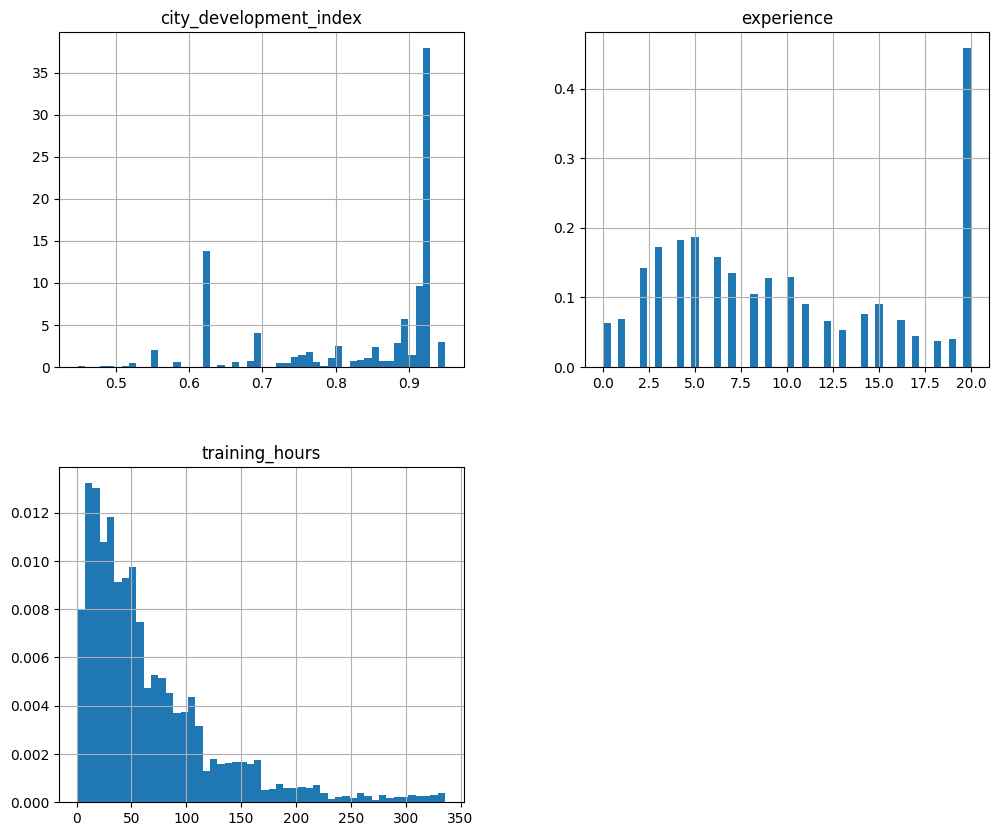

In [13]:
new_df.hist(bins= 50, density= True, figsize= (12, 10))
plt.show()

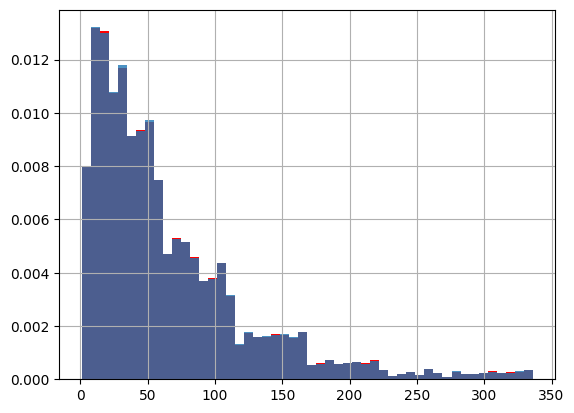

In [14]:
fig= plt.figure()
ax= fig.add_subplot(111)

#orginal data
df['training_hours'].hist(bins= 50, density= True, color= 'red')

#data after cca, the argument alpha makes the color transforent, so we can
#see the orverly of the 2 distributions.
new_df['training_hours'].hist(bins= 50, ax=ax, density= True, alpha= 0.8)

plt.show()

<Axes: ylabel='Density'>

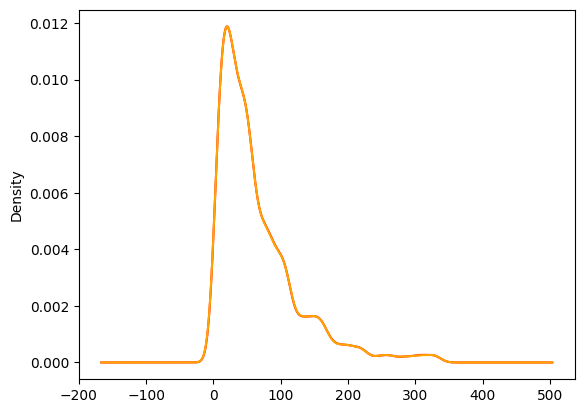

In [15]:
fig= plt.figure()
ax= fig.add_subplot(111)

#before orginal data
df['training_hours'].plot.density(color= 'red')

#after data
new_df['training_hours'].plot.density(color= 'orange', ax= ax)

In [16]:
new_df.sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
8160,0.903,no_enrollment,High School,7.0,41.0
16845,0.865,no_enrollment,Graduate,14.0,140.0
546,0.924,no_enrollment,Masters,7.0,163.0
14393,0.579,no_enrollment,Graduate,5.0,14.0
11535,0.887,no_enrollment,Graduate,10.0,106.0


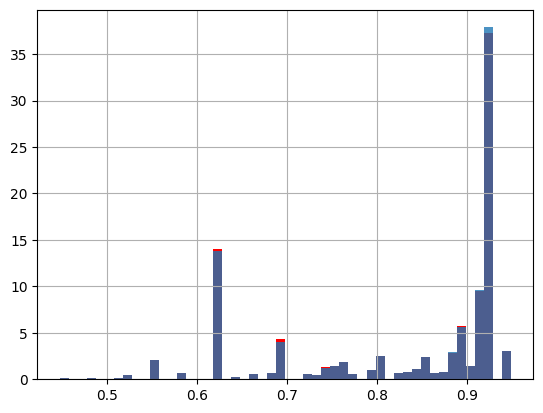

In [17]:
fig= plt.figure()
ax= fig.add_subplot(111)

#orginal data
df['city_development_index'].hist(bins= 50, density= True, color= 'red')

#data after cca, the argument alpha makes the color transforent, so we can
#see the orverly of the 2 distributions.
new_df['city_development_index'].hist(bins= 50, ax=ax, density= True, alpha= 0.8)

plt.show()

<Axes: ylabel='Density'>

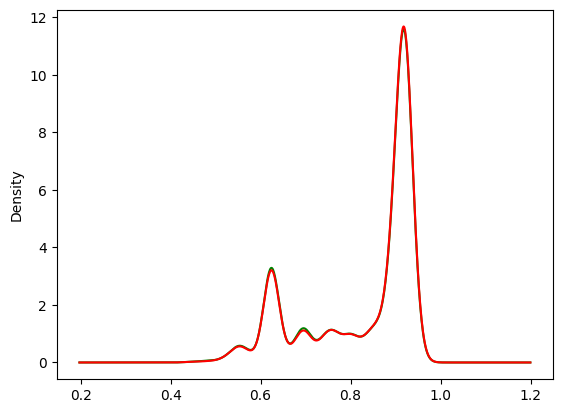

In [18]:
fig= plt.figure()
ax= fig.add_subplot(111)

#before original data
df['city_development_index'].plot.density(color= 'green')

#after
new_df['city_development_index'].plot.density(ax=ax, color= 'red')

<Axes: >

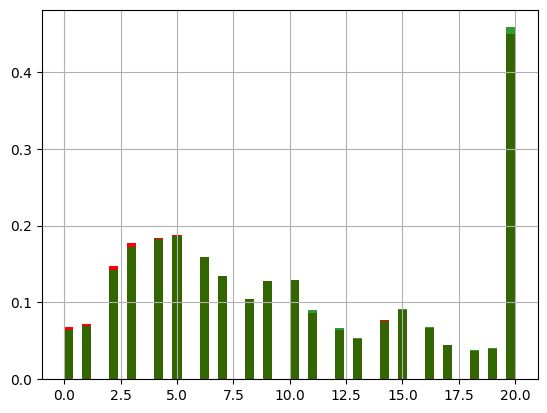

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

In [20]:
new_df.sample(2)

,city_development_index,enrolled_university,education_level,experience,training_hours
464,0.767,Part time course,Masters,6.0,56.0
14361,0.890,no_enrollment,Graduate,17.0,96.0


In [21]:
temp= pd.concat([
   # percentage of observations per category, original data
    df['enrolled_university'].value_counts() / len(df),

    # percentage of observations per category, cca data
    new_df['enrolled_university'].value_counts() / len(new_df)
    
], axis= 1)

#add columns name
temp.columns= ['Orginal', 'CCA']
temp

,Orginal,CCA
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [22]:
temp1= pd.concat([
    #parcentage of observations per categorical, original data
    df['education_level'].value_counts() / len(df),

    #parcentage of observations per categorical, CCA data
    new_df['education_level'].value_counts() / len(new_df)
], axis= 1)

temp1.columns = ['Original', 'CCA']

temp1

,Original,CCA
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
